## Machine-Learning-Project-Predictive-Maintenance-For-Metro-Vehicles

### References : *Davari,Narjes, Veloso,Bruno, Ribeiro  ,Rita, and Gama,Joao. (2023). MetroPT-3 Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5VW3R.*

#### Description of Project
The dataset that I’m going to use for this project is to support the development of models for predictive maintenance, anomaly detection, and prediction of remaining useful life (RUL) for compressors using machine learning techniques. 
It comprises of multivariate time series data collected from a train's compressor, obtained from a combination of analog and digital sensors. The data covers a period between February and August 2020 and includes 15 different signals such as pressures, motor current, oil temperature, and electrical signals from air intake valves. Industrial equipment events like temporal behavior and fault events were logged using onboard sensors, and the data was recorded by an embedded device. 

#### Possible Data Analytic&Machine Learning Goals
After I finished EDA, Data Preprocessing, Visualizing steps I want to create a Predictive Model in order to predict potential failures of APU (Air Production Unit). 
According to my initial hypothesis LPS feature (Sensor that is activated, and the pressure is lower than 7 bar and the equipment stops working) which is a binary feature should be my target feature.
Therefore I will split data to train and test sets by X (other features) and Y (LPS) and then I will implement supervised learning models such linear regression and unsupervised models like logistic regression, classifiers e.g. KNN, SVM, Catboost, XGBoost, Decision Tree, RandomForest to calculate accuracy, recall, precision, f-score scores in order to predict potential failures.


### A - Load the python library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### B - Read the data

In [2]:
# Reading the csv file and using some fraction of sample to run smoothly and faster since there is 1.5 million rows of data 
df = pd.read_csv('Dataset/MetroPT3(AirCompressor).csv').sample(frac=0.001, random_state=42)


### C - Exploratory Data Analysis

In [3]:
# First five rows
df.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
616521,6165210,2020-04-24 19:37:47,-0.012,9.148,9.136,-0.022,9.148,57.900,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1270055,12700550,2020-07-28 11:06:17,-0.016,9.852,9.840,-0.016,9.850,73.375,3.7000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306770,3067700,2020-03-13 11:29:05,-0.016,8.398,8.386,-0.022,8.398,56.425,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
404825,4048250,2020-03-26 06:23:04,-0.016,9.808,9.798,-0.024,9.804,68.350,3.8475,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
741354,7413540,2020-05-15 04:54:54,-0.014,9.382,9.370,-0.024,9.380,57.775,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
# Statistical analysis
print(df.info())
print(df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 616521 to 36837
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1517 non-null   int64  
 1   timestamp        1517 non-null   object 
 2   TP2              1517 non-null   float64
 3   TP3              1517 non-null   float64
 4   H1               1517 non-null   float64
 5   DV_pressure      1517 non-null   float64
 6   Reservoirs       1517 non-null   float64
 7   Oil_temperature  1517 non-null   float64
 8   Motor_current    1517 non-null   float64
 9   COMP             1517 non-null   float64
 10  DV_eletric       1517 non-null   float64
 11  Towers           1517 non-null   float64
 12  MPG              1517 non-null   float64
 13  LPS              1517 non-null   float64
 14  Pressure_switch  1517 non-null   float64
 15  Oil_level        1517 non-null   float64
 16  Caudal_impulses  1517 non-null   float64
dtypes: float

In [5]:
# Shape of dataframe
df.shape

(1517, 17)

In [6]:
# Checking the number of null values per column
null_counts = df.isnull().sum()

print(null_counts)


Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


In [7]:
# Checking column names format
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

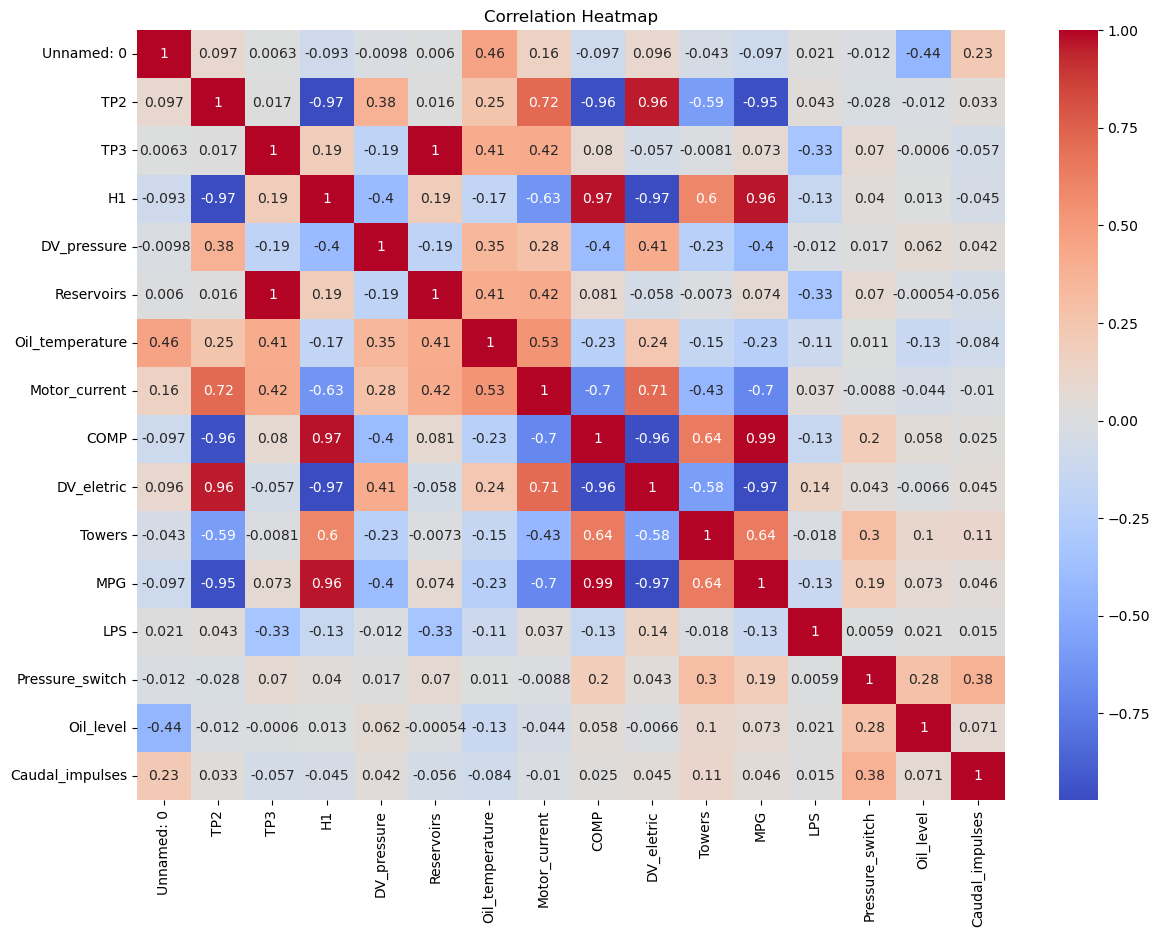

In [8]:
# Heatmap to see correlations
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Calculating the correlation matrix between columns
corr_matrix = df.corr()

# Focusing on the correlation with 'LPS'
num_ratings_corr = corr_matrix['LPS']

# Sorting the correlations of 'LPS' in descending order
num_ratings_corr = num_ratings_corr.abs().sort_values(ascending=False)

print("Correlation with 'LPS'","\n")
print(num_ratings_corr,"\n")


Correlation with 'LPS' 

LPS                1.000000
Reservoirs         0.328528
TP3                0.327837
DV_eletric         0.136037
H1                 0.134241
COMP               0.133032
MPG                0.132160
Oil_temperature    0.114113
TP2                0.042919
Motor_current      0.037380
Unnamed: 0         0.021225
Oil_level          0.021028
Towers             0.018441
Caudal_impulses    0.015353
DV_pressure        0.012040
Pressure_switch    0.005859
Name: LPS, dtype: float64 



### D- Univariate Analysis

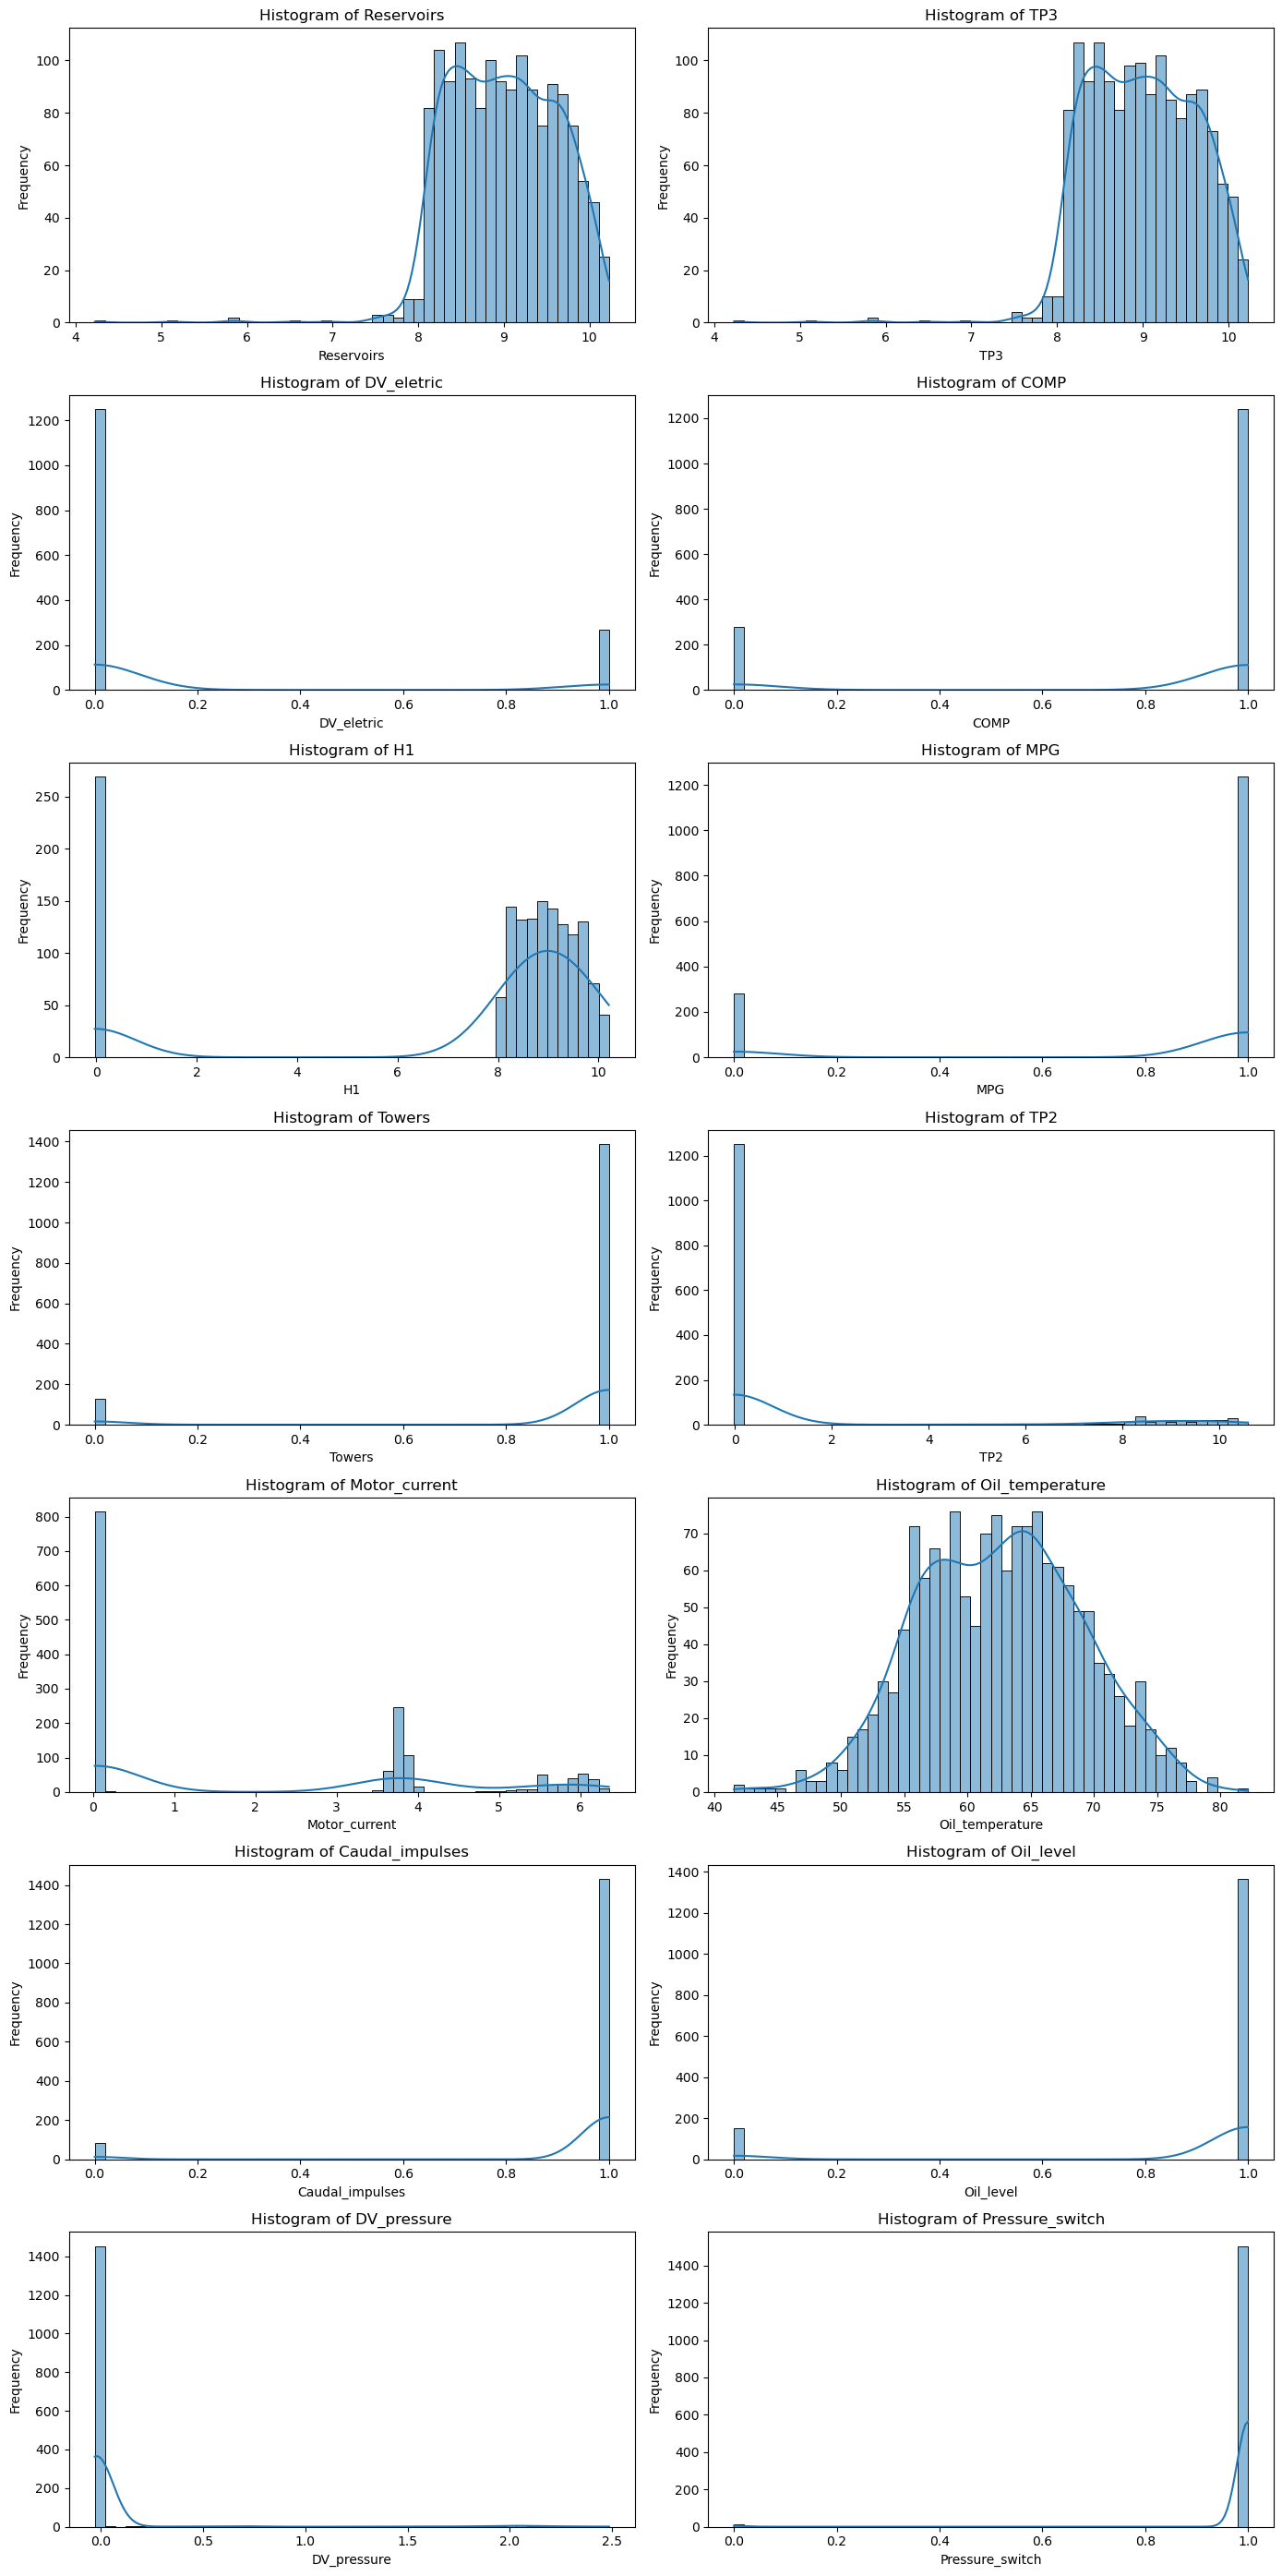

In [10]:
# List of features
features = ['Reservoirs', 'TP3', 'DV_eletric', 'COMP', 'H1', 'MPG','Towers','TP2','Motor_current','Oil_temperature','Caudal_impulses','Oil_level','DV_pressure','Pressure_switch']

# Create subplots
fig, axes = plt.subplots(7, 2, figsize=(14, 7*4))

for feature, ax in zip(features, axes.flatten()):
    sns.histplot(df[feature], bins=50, kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f"Histogram of {feature}")

# To handle odd number of features
if len(features) % 2:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()



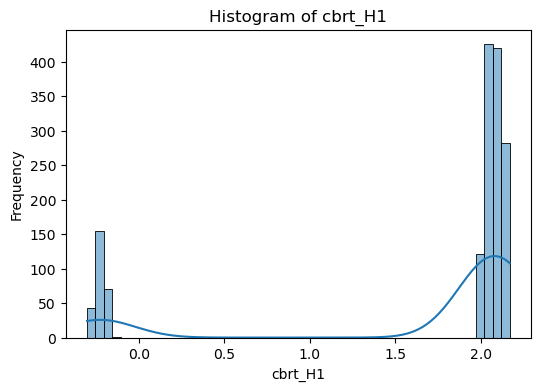

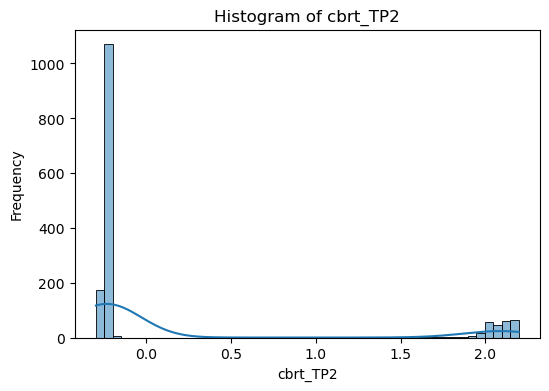

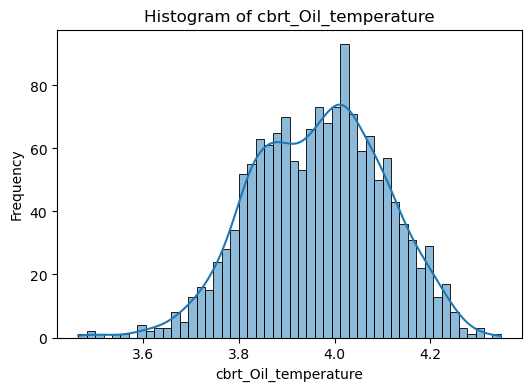

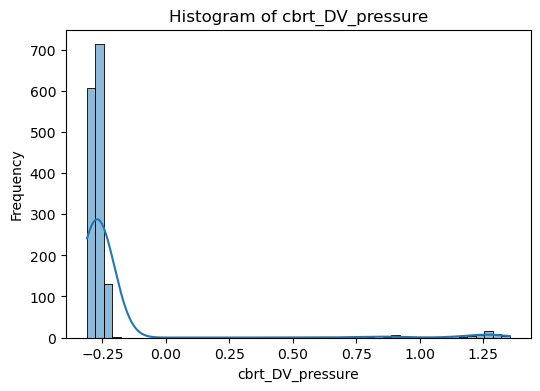

In [11]:
# Applying cbrt transformation to H1, TP2, Oil_temperature, DV_pressure
df['cbrt_H1'] = np.cbrt(df['H1'])
df['cbrt_TP2'] = np.cbrt(df['TP2'])
df['cbrt_Oil_temperature'] = np.cbrt(df['Oil_temperature'])
df['cbrt_DV_pressure'] = np.cbrt(df['DV_pressure'])

# List of top correlated features
features = ['cbrt_H1', 'cbrt_TP2','cbrt_Oil_temperature','cbrt_DV_pressure']

# Loop through features and create a histogram for each
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {feature}")
    plt.show()


In [12]:
import pandas as pd
import shutil

# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Save the cleaned dataframe as a CSV file
cleaned_dataset_path = 'cleaned_MetroPT3(AirCompressor).csv'
df.to_csv(cleaned_dataset_path, index=False)

# Move the cleaned dataset to the "Dataset" folder
destination_path = 'Dataset/cleaned_MetroPT3(AirCompressor).csv'
shutil.move(cleaned_dataset_path, destination_path)

'Dataset/cleaned_MetroPT3(AirCompressor).csv'

### E - Grid Search for different SVM classification

In [13]:
# Define features and target variables
features = ['Reservoirs', 'TP3', 'cbrt_H1', 'cbrt_TP2', 'cbrt_Oil_temperature', 'cbrt_DV_pressure']
target = 'LPS'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use SelectFromModel with LogisticRegression to select features
selector = SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print selected features
selected_features = np.array(features)[selector.get_support()]
print("Selected features:", selected_features)

# Define the parameter grid for the SVM classifier
param_grid = {
    'C': [0.1, 1, 100],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'poly']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=4
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_selected, y_train)


Selected features: ['Reservoirs' 'TP3']
Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [14]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train_selected, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_selected)

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Confusion Matrix:
[[378   0]
 [  1   1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       378
         1.0       1.00      0.50      0.67         2

    accuracy                           1.00       380
   macro avg       1.00      0.75      0.83       380
weighted avg       1.00      1.00      1.00       380



### F - Classifications and Regressions Models

In [15]:
# Define the list of regressor models
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100)),
    ('GradientBoosting Regressor', GradientBoostingRegressor()),
    ('AdaBoost Regressor', AdaBoostRegressor()),
    ('XGBoost Regressor', XGBRegressor()),
    ('CatBoost Regressor', CatBoostRegressor()),
    ('LightGBM Regressor', LGBMRegressor()),
    ('SGD Regressor', SGDRegressor(max_iter=1000))
]
# Initializing variables to track the best performing pipeline
best_pipeline = None
best_score = 0.0

# Creating a placeholder for actual vs predicted values
actual_predicted_values = {}

# Creating a dictionary to store performance metrics for each regressor
performance_metrics = {}


# Iterating over regressors
for regressor_name, regressor in regressors:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
        ('regressor', regressor)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_pipeline = pipeline
        best_regressor_name = regressor_name
    
    # Storing actual vs predicted values for the regressor
    y_pred = pipeline.predict(X_test)
    actual_predicted_values[regressor_name] = {'actual': y_test, 'predicted': y_pred}
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store performance metrics for the regressor
    performance_metrics[regressor_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

Learning rate set to 0.041782
0:	learn: 0.0577914	total: 146ms	remaining: 2m 26s
1:	learn: 0.0564082	total: 152ms	remaining: 1m 15s
2:	learn: 0.0550583	total: 158ms	remaining: 52.6s
3:	learn: 0.0537408	total: 164ms	remaining: 40.9s
4:	learn: 0.0524548	total: 170ms	remaining: 33.9s
5:	learn: 0.0511998	total: 175ms	remaining: 28.9s
6:	learn: 0.0499749	total: 177ms	remaining: 25.1s
7:	learn: 0.0487794	total: 179ms	remaining: 22.2s
8:	learn: 0.0476126	total: 182ms	remaining: 20s
9:	learn: 0.0464737	total: 184ms	remaining: 18.2s
10:	learn: 0.0453622	total: 186ms	remaining: 16.8s
11:	learn: 0.0442773	total: 189ms	remaining: 15.5s
12:	learn: 0.0432184	total: 191ms	remaining: 14.5s
13:	learn: 0.0421849	total: 193ms	remaining: 13.6s
14:	learn: 0.0411762	total: 196ms	remaining: 12.9s
15:	learn: 0.0401916	total: 198ms	remaining: 12.2s
16:	learn: 0.0392307	total: 201ms	remaining: 11.6s
17:	learn: 0.0382927	total: 203ms	remaining: 11.1s
18:	learn: 0.0373772	total: 204ms	remaining: 10.5s
19:	learn: 

166:	learn: 0.0010447	total: 386ms	remaining: 1.93s
167:	learn: 0.0010198	total: 388ms	remaining: 1.92s
168:	learn: 0.0009955	total: 389ms	remaining: 1.91s
169:	learn: 0.0009717	total: 390ms	remaining: 1.9s
170:	learn: 0.0009485	total: 391ms	remaining: 1.9s
171:	learn: 0.0009258	total: 393ms	remaining: 1.89s
172:	learn: 0.0009037	total: 394ms	remaining: 1.88s
173:	learn: 0.0008822	total: 395ms	remaining: 1.87s
174:	learn: 0.0008611	total: 396ms	remaining: 1.87s
175:	learn: 0.0008406	total: 397ms	remaining: 1.86s
176:	learn: 0.0008205	total: 399ms	remaining: 1.85s
177:	learn: 0.0008009	total: 400ms	remaining: 1.85s
178:	learn: 0.0007818	total: 401ms	remaining: 1.84s
179:	learn: 0.0007631	total: 402ms	remaining: 1.83s
180:	learn: 0.0007449	total: 404ms	remaining: 1.83s
181:	learn: 0.0007271	total: 405ms	remaining: 1.82s
182:	learn: 0.0007098	total: 406ms	remaining: 1.81s
183:	learn: 0.0006928	total: 407ms	remaining: 1.8s
184:	learn: 0.0006763	total: 408ms	remaining: 1.8s
185:	learn: 0.00

470:	learn: 0.0000047	total: 758ms	remaining: 851ms
471:	learn: 0.0000047	total: 759ms	remaining: 849ms
472:	learn: 0.0000047	total: 761ms	remaining: 847ms
473:	learn: 0.0000047	total: 762ms	remaining: 845ms
474:	learn: 0.0000047	total: 763ms	remaining: 843ms
475:	learn: 0.0000047	total: 764ms	remaining: 841ms
476:	learn: 0.0000047	total: 765ms	remaining: 839ms
477:	learn: 0.0000047	total: 767ms	remaining: 837ms
478:	learn: 0.0000047	total: 768ms	remaining: 835ms
479:	learn: 0.0000046	total: 769ms	remaining: 833ms
480:	learn: 0.0000046	total: 770ms	remaining: 831ms
481:	learn: 0.0000046	total: 771ms	remaining: 829ms
482:	learn: 0.0000046	total: 773ms	remaining: 827ms
483:	learn: 0.0000046	total: 774ms	remaining: 825ms
484:	learn: 0.0000046	total: 775ms	remaining: 823ms
485:	learn: 0.0000045	total: 776ms	remaining: 821ms
486:	learn: 0.0000045	total: 778ms	remaining: 819ms
487:	learn: 0.0000045	total: 779ms	remaining: 817ms
488:	learn: 0.0000045	total: 780ms	remaining: 815ms
489:	learn: 

775:	learn: 0.0000025	total: 1.13s	remaining: 327ms
776:	learn: 0.0000025	total: 1.14s	remaining: 326ms
777:	learn: 0.0000025	total: 1.14s	remaining: 324ms
778:	learn: 0.0000025	total: 1.14s	remaining: 323ms
779:	learn: 0.0000025	total: 1.14s	remaining: 321ms
780:	learn: 0.0000025	total: 1.14s	remaining: 320ms
781:	learn: 0.0000025	total: 1.14s	remaining: 318ms
782:	learn: 0.0000025	total: 1.14s	remaining: 317ms
783:	learn: 0.0000025	total: 1.14s	remaining: 315ms
784:	learn: 0.0000025	total: 1.15s	remaining: 314ms
785:	learn: 0.0000025	total: 1.15s	remaining: 312ms
786:	learn: 0.0000025	total: 1.15s	remaining: 311ms
787:	learn: 0.0000025	total: 1.15s	remaining: 309ms
788:	learn: 0.0000025	total: 1.15s	remaining: 308ms
789:	learn: 0.0000025	total: 1.15s	remaining: 306ms
790:	learn: 0.0000025	total: 1.15s	remaining: 305ms
791:	learn: 0.0000025	total: 1.15s	remaining: 303ms
792:	learn: 0.0000025	total: 1.16s	remaining: 302ms
793:	learn: 0.0000025	total: 1.16s	remaining: 300ms
794:	learn: 

In [16]:
# Print performance metrics for all regressors
for regressor_name, metrics in performance_metrics.items():
    print(f'Regressor: {regressor_name}')
    print(f'MSE: {metrics["MSE"]:.4f}')
    print(f'MAE: {metrics["MAE"]:.4f}')
    print(f'R2: {metrics["R2"]:.4f}')
    print()

Regressor: Linear Regression
MSE: 0.0045
MAE: 0.0212
R2: 0.1422

Regressor: Decision Tree Regressor
MSE: 0.0000
MAE: 0.0000
R2: 1.0000

Regressor: Random Forest Regressor
MSE: 0.0003
MAE: 0.0011
R2: 0.9372

Regressor: GradientBoosting Regressor
MSE: 0.0000
MAE: 0.0000
R2: 1.0000

Regressor: AdaBoost Regressor
MSE: 0.0026
MAE: 0.0026
R2: 0.4974

Regressor: XGBoost Regressor
MSE: 0.0000
MAE: 0.0000
R2: 1.0000

Regressor: CatBoost Regressor
MSE: 0.0000
MAE: 0.0000
R2: 1.0000

Regressor: LightGBM Regressor
MSE: 0.0039
MAE: 0.0068
R2: 0.2561

Regressor: SGD Regressor
MSE: 0.0048
MAE: 0.0261
R2: 0.0859



### G - Elbow Method to find the optimal number of clusters

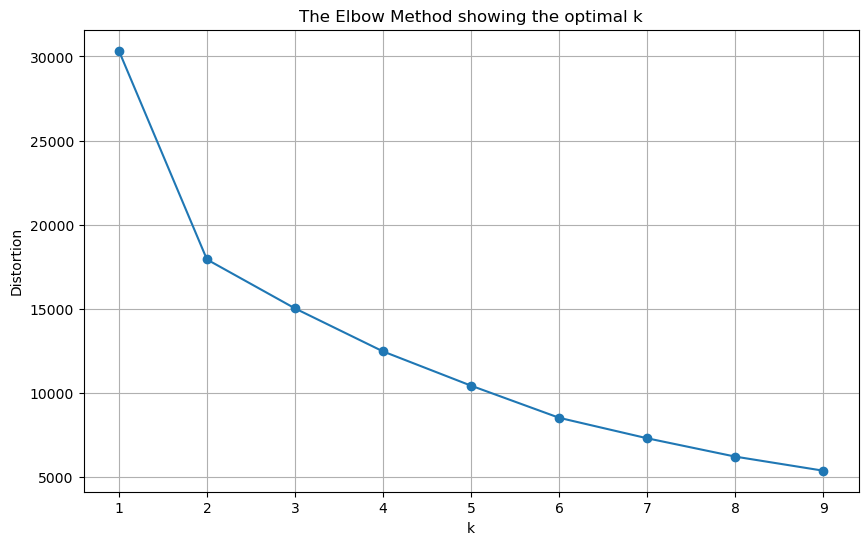

In [17]:
# This will select only the numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=[np.number])  

# Now you can standardize your features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()


### H - Silhouette analysis to find the optimal number of clusters

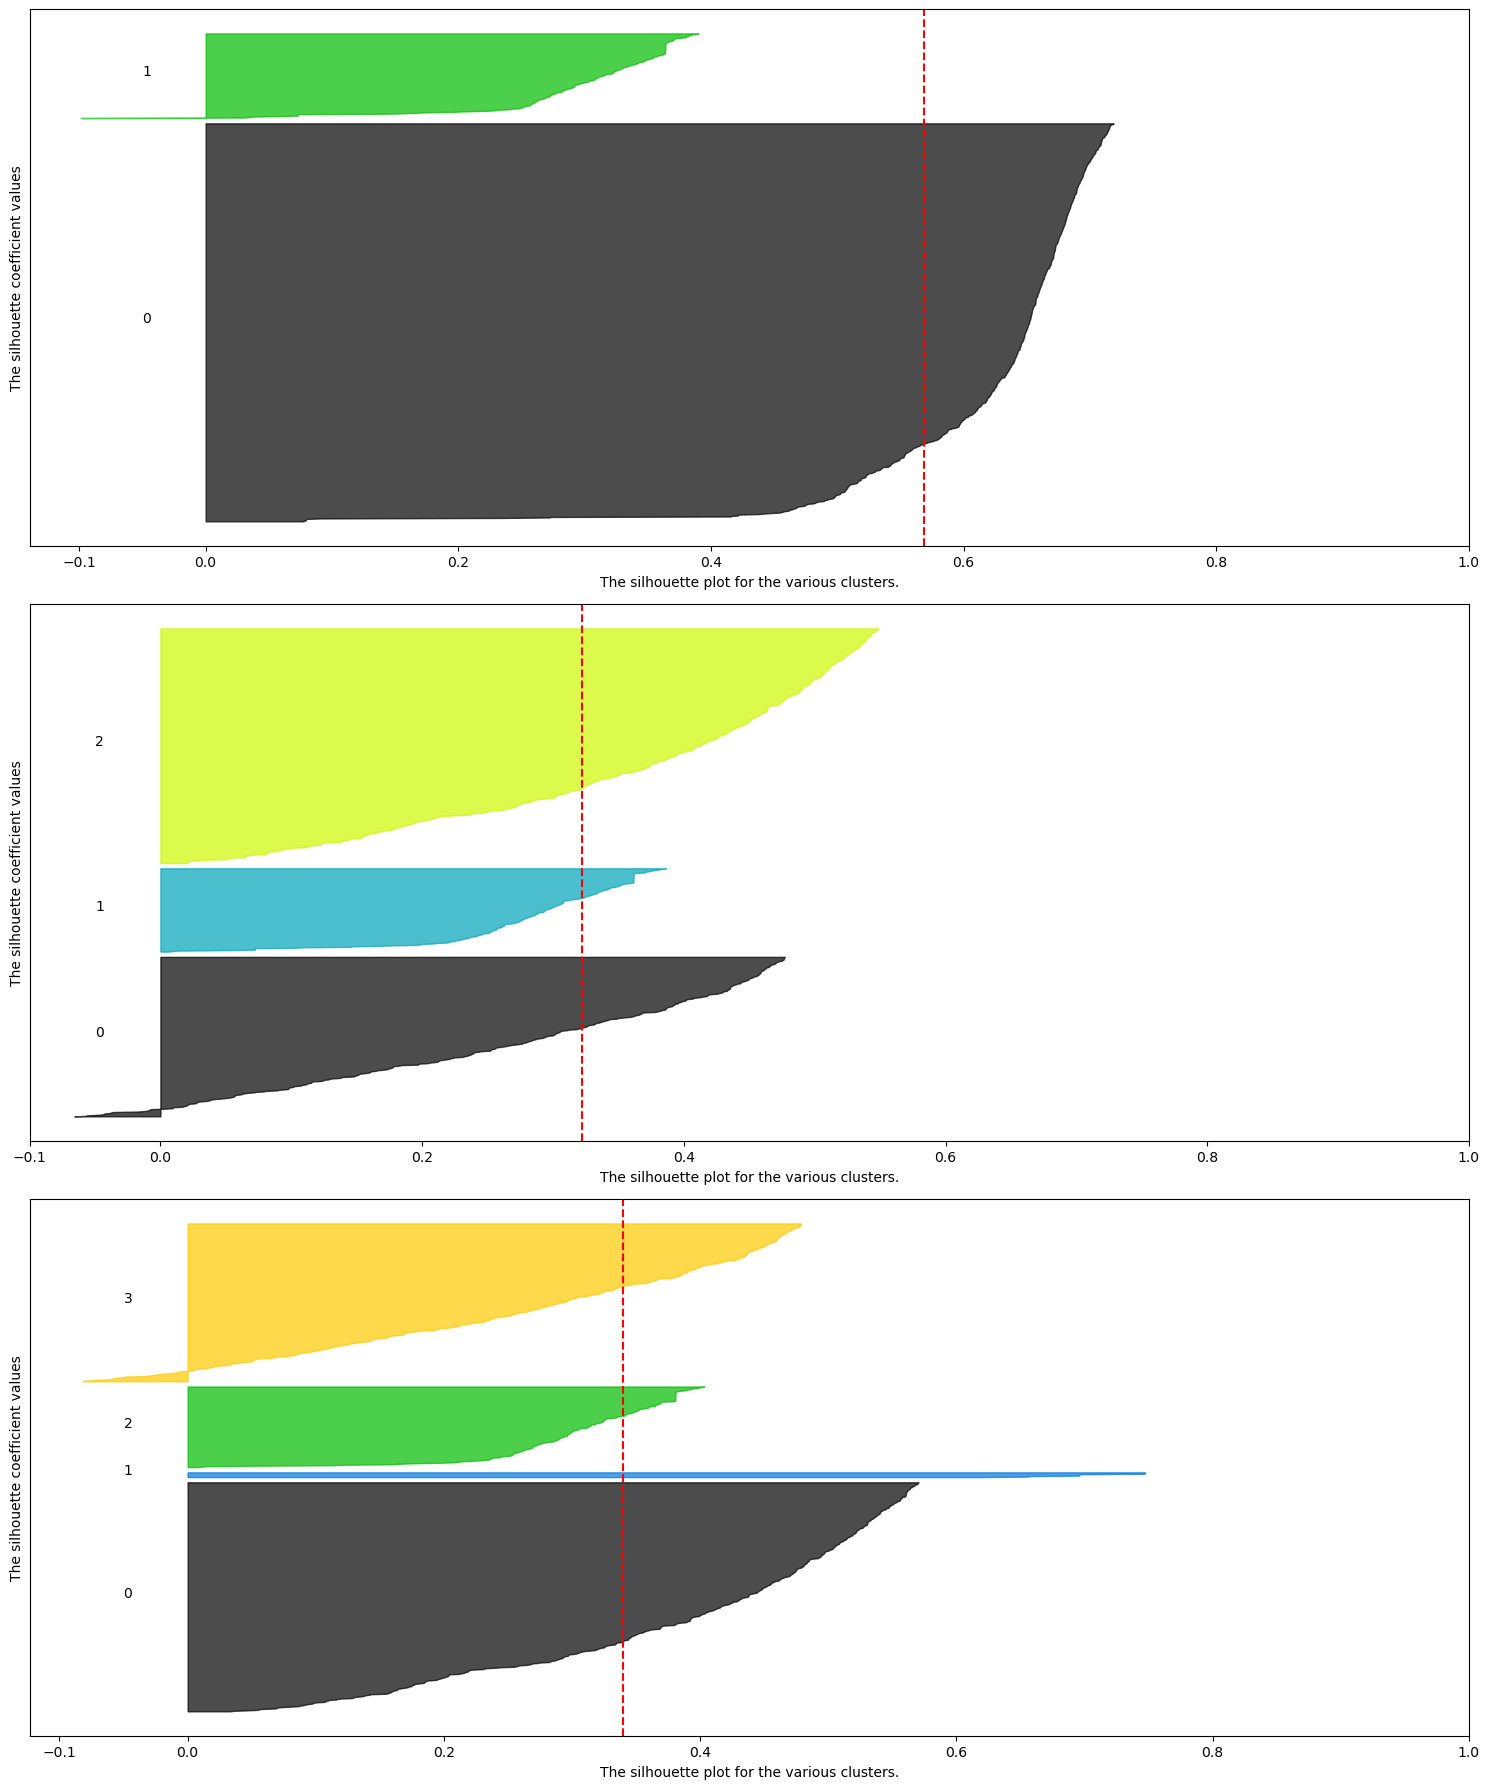

In [18]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

df_sample = df.sample(n=1000)  # Adjust n as needed
df_sample = df_sample.drop(columns=['timestamp'])  # drop the 'timestamp' column
df_sample_scaled = scaler.transform(df_sample)



# Compute silhouette scores for different number of clusters ranging from 2 to 4
silhouette_scores = []
n_clusters = list(range(2, 5))

# Function to plot silhouette analysis
def silhouette_plot(X, cluster_labels, n_clusters, ax=None):
    # Compute the silhouette scores for each sample
    silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("The silhouette plot for the various clusters.")
    ax.set_ylabel("The silhouette coefficient values")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_score(X, cluster_labels), color="red", linestyle="--")

fig, axs = plt.subplots(3, 1, figsize=(15, 18))

for idx, n_cluster in enumerate([2, 3, 4]):
    kmeans = KMeans(n_clusters=n_cluster, random_state=1)
    cluster_labels = kmeans.fit_predict(df_sample_scaled)
    silhouette_plot(df_sample_scaled, cluster_labels, n_cluster, ax=axs[idx])

plt.tight_layout()
plt.show()

### I - K Means (k = 3) Clustering analysis 

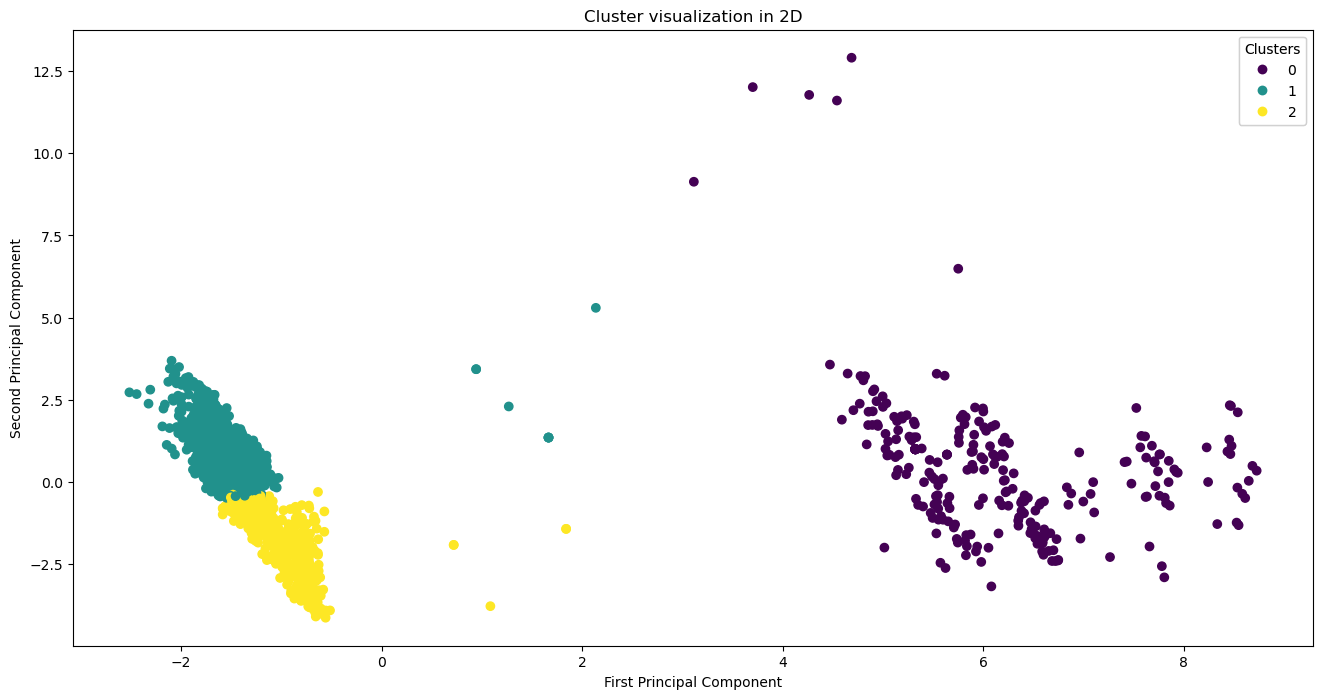

In [19]:
from sklearn.decomposition import PCA

# Apply k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)

# Project the data into 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a new dataframe with the two principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels
pc_df['Cluster'] = kmeans.labels_

# Create a scatter plot with a legend
plt.figure(figsize=(16,8))
scatter = plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster visualization in 2D')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

### J - Model Development and Training

In [20]:
# Setting target and features
X = df.drop(['LPS','timestamp'], axis=1)
y = df['LPS']

# Splitting data into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the temporary set into validation and test sets using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

n_timesteps = 1
n_features = X.shape[1]  # set n_features based on X

X_train = X_train.values.reshape((X_train.shape[0], n_timesteps, X_train.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], n_timesteps, X_val.shape[1]))

# Also reshape your target data to match the input data shape
y_train = y_train.values.reshape((y_train.shape[0], n_timesteps, 1))
y_val = y_val.values.reshape((y_val.shape[0], n_timesteps, 1))

# Increasing model complexity: Adding more layers to the model
model_complex = Sequential()
# LSTM Encoder
model_complex.add(LSTM(100, activation='relu', input_shape=(n_timesteps,n_features), return_sequences=True))
model_complex.add(LSTM(50, activation='relu', return_sequences=False))
model_complex.add(RepeatVector(n_timesteps))
# LSTM Decoder
model_complex.add(LSTM(50, activation='relu', return_sequences=True))
model_complex.add(LSTM(100, activation='relu', return_sequences=True))
model_complex.add(TimeDistributed(Dense(n_features)))

model_complex.compile(optimizer=Adam(), loss='mse')

history_complex = model_complex.fit(X_train, y_train, epochs=50, batch_size=200, validation_data=(X_val, y_val))


Epoch 1/50
7/7 [==============================] - 5s 98ms/step - loss: 4392395.0000 - val_loss: 1715644.8750
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 1324595.7500 - val_loss: 590163.3750
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 609660.1250 - val_loss: 503328.2188
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 469892.3125 - val_loss: 364255.2500
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 316193.9375 - val_loss: 304027.0625
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 307438.0000 - val_loss: 230604.0469
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 221753.2656 - val_loss: 158044.3750
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: 192382.1875 - val_loss: 110295.3984
Epoch 9/50
7/7 [==============================] - 0s 9ms/step - loss: 153586.9062 - val_loss: 430629.1875
Epoch 10/50
7/7 [=======================

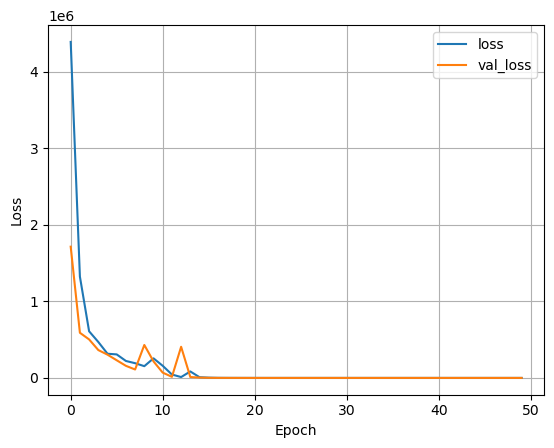

In [21]:
# Plotting epoch loss
def plot_loss(history):
    fig = plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history_complex)

### K - Anomaly Detection Using LSTM Autoencoder


In [22]:
# Reshape X_test
X_test = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))

# Make predictions
y_pred = model_complex.predict(X_test)

# Calculate MSE for each data point
mse = np.mean(np.power(X_test - y_pred, 2), axis=2)

# Flatten the mse array
mse = mse.flatten()

# If mse is above a certain threshold, mark it as an anomaly
threshold = 0.001  
anomalies = mse > threshold

# Print the indices of the anomalies
anomaly_indices = np.where(anomalies)[0]
print("Anomaly indices:", anomaly_indices)



5/5 [==============================] - 1s 2ms/step
Anomaly indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151]


### L - Anomaly Detection Results

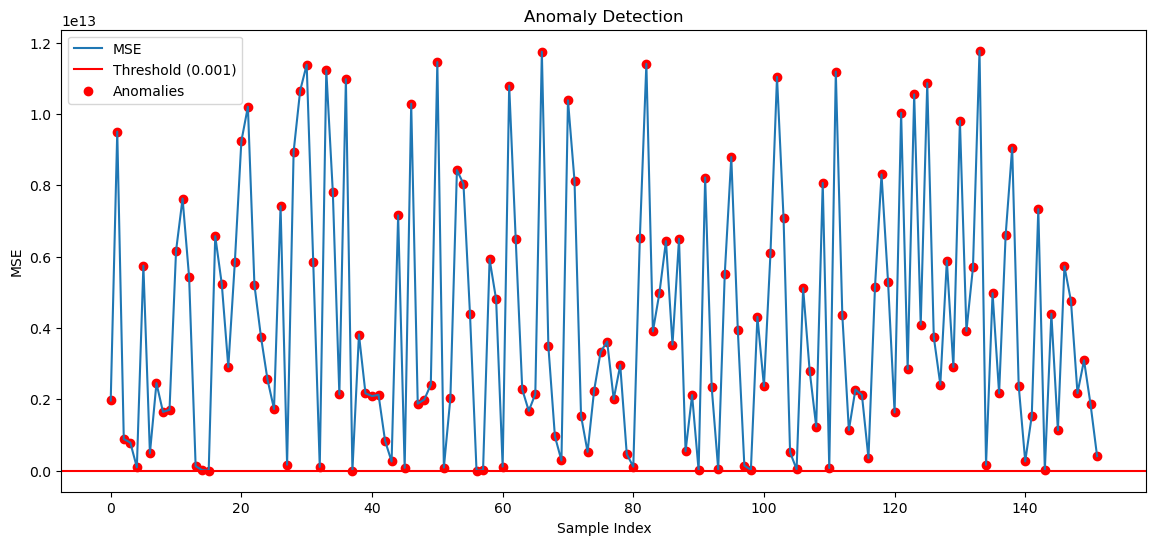

In [23]:
# Create a plot
plt.figure(figsize=(14,6))

# Plot the MSE
plt.plot(mse, label='MSE')

# Plot the threshold
plt.axhline(y=threshold, color='r', linestyle='-', label=f'Threshold ({threshold})')

# Highlight the anomalies
plt.scatter(anomaly_indices, mse[anomaly_indices], color='r', label='Anomalies')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection')

# Show legend
plt.legend()

# Display the plot
plt.show()


### M - Evaluation of Model Performance

In [24]:
# Reshape X_test and y_test
X_test_array = X_test.reshape((X_test.shape[0], n_timesteps, n_features))
y_test_flat = y_test.values.flatten()

# Make predictions
y_pred_flat = model_complex.predict(X_test_array).flatten()

# Ensure the shapes of y_test_flat and y_pred_flat match
if y_test_flat.shape != y_pred_flat.shape:
    y_pred_flat = y_pred_flat[:y_test_flat.shape[0]]  # Trim y_pred_flat to match y_test_flat size

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test_flat, y_pred_flat)
print('Test MSE: ', mse)


5/5 [==============================] - 0s 2ms/step
Test MSE:  0.00046527287772989823


### N - Summary of Model Architecture

In [25]:
model_complex.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            48000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 50)             0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_3 (LSTM)               (None, 1, 100)            60400     
                                                                 
 time_distributed (TimeDist  (None, 1, 19)             1919      
 ributed)                                               